In [ ]:
pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torc

# **Loading Human DNA Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
human_dna = pd.read_table('/content/human.txt')
print(human_dna.head())
print('total number of sequence data', len(human_dna.sequence))
print('sequence data sample:', human_dna.sequence[0])

                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...    4.0
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...    4.0
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...    3.0
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...    3.0
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...    3.0
total number of sequence data 4208
sequence data sample: ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


# **Algorithm for de-Bruijn**

In [ ]:
def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}


    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]

        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]

        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue

        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return kmers

def get_debruijn_edges_from_kmers(kmers):
    """
    Every possible (k-1)mer (n-1 suffix and prefix of kmers) is assigned
    to a node, and we connect one node to another if the (k-1)mer overlaps
    another. Nodes are (k-1)mers, edges are kmers.
    """
    # store edges as tuples in a set
    edges = set()

    # compare each (k-1)mer
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                # if they overlap then add to edges
                if k1[1:] == k2[:-1]:
                    edges.add((k1[:-1], k2[:-1]))
                if k1[:-1] == k2[1:]:
                    edges.add((k2[:-1], k1[:-1]))

    return edges

# **Constructing the graphs**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
graph_list = []
for seq in human_dna.sequence:
  kmers = get_kmer_count_from_sequence(seq, k=4) #setting k = 4
  edges = get_debruijn_edges_from_kmers(kmers)
  graph = nx.DiGraph()
  graph.add_edges_from(edges)
  graph_list.append(graph)


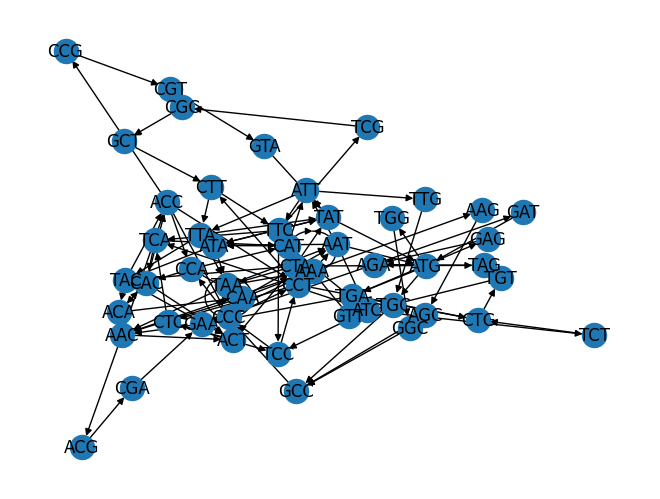

In [ ]:
#graph example
nx.draw(graph_list[0],pos = nx.spring_layout(graph_list[0]),with_labels = True)

# **storing the generated graph**

In [ ]:
import pickle
file_name = "graph_list.pkl"
with open(file_name, "wb") as f:
    pickle.dump(graph_list, f)

In [ ]:
#to load the graphs from file
import pickle
with open(file_name, "rb") as f:
    loaded_graph_list = pickle.load(f)

# **Node2vec Embedding Models**

### using test dataset for shorter runtime for demostration purposes

In [ ]:
from node2vec import Node2Vec
total_length = len(graph_list)
graph_list_1 = graph_list[:(total_length//4)]
graph_list_2 = graph_list[:2*(total_length//4)]
graph_list_3 = graph_list_2 = graph_list[:3*(total_length//4)]
graph_list_4 = graph_list_2 = graph_list[3*(total_length//4):]
graph_list_test = graph_list[:20]

embedding_model_list_test = []
embedding_model_list_1 = []
embedding_model_list_2 = []
embedding_model_list_3 = []
embedding_model_list_4 = []


In [ ]:
for g in graph_list_test:
  node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  embeddings = {node: model.wv[node] for node in g.nodes()}
  embedding_model_list_test.append(embeddings)

Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/42 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/38 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
input_vector_list = []
for embeddings in embedding_model_list_test:
  arr = []
  for node in embeddings:
    temp = 0
    for value in embeddings[node]:
      temp = temp + float(value)
    arr.append(temp)
  input_vector_list.append(arr)

print(input_vector_list)
print(input_vector_list[0])


[[1.7146904187102336, 1.2582785673439503, 1.3499493058770895, 0.1072775749489665, 1.3375865113921463, 2.0861198267084546, 0.33400536933913827, 1.046935268677771, -0.05166543694213033, 0.5385364026442403, 1.933142080437392, -1.5312825995497406, 0.24263199709821492, -0.5214389653701801, 0.6463420672807842, -1.4873566562309861, -0.15592957637272775, 1.534692441811785, 1.0255005275539588, -1.9651615680195391, -0.07912030071020126, -1.9274697394575924, 0.873660491546616, 0.2965689994452987, -2.424357343232259, 3.0725656216964126, 0.9041600348427892, 0.22274537291377783, -0.19646969554014504, 1.795989646227099, 1.1893731211312115, -0.7731290707597509, -0.5418746795039624, -0.9383632226381451, -0.8470451864413917, 0.18342733790632337, 2.2832210089545697, 0.3612931817770004, 3.8598682675510645, -1.997022481635213, 2.978983375709504, 2.0203669510083273, 1.2026847158558667, 3.07154646422714, -0.9370146347209811, 0.9307854424696416, 1.0929256547242403, -1.720296554500237, -0.935985911404714, 1.50

**vector list will be use as input for NN and SVM classifiers**

In [ ]:
with open('vectors_test.data', 'wb') as f:
        pickle.dump(input_vector_list, f)

